In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

In [3]:
baseline_file = get_baseline()
runName = os.path.split(baseline_file)[-1].replace('.db', '')

opsdb = maf.OpsimDatabase(baseline_file)
print(runName)

baseline_v2.0_10yrs


In [4]:
bundle = {}
s = maf.HealpixSlicer(nside=64, useCache=False)
for f in ('u', 'g', 'r', 'i', 'z', 'y'):
    m = maf.QSONumberCountsMetric(f)
    sql = f'filter = "{f}" and note not like "%DD%"'
    bundle[f] = maf.MetricBundle(m, s, sql, runName=runName, metadata=f'{f} band non-DD')

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [6]:
g = maf.MetricBundleGroup(bundle, opsdb, 'temp', None)
g.runAll()

Querying database observations with constraint filter = "y" and note not like "%DD%" for columns ['fieldDec', 'rotSkyPos', 'seeingFwhmEff', 'airmass', 'visitExposureTime', 'skyBrightness', 'filter', 'fieldRA', 'numExposures', 'fiveSigmaDepth']
Found 369455 visits
Running:  ['y']


/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:25: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(f"Slicer value of nside {slicePoints['nside']} different "


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "g" and note not like "%DD%" for columns ['fieldDec', 'rotSkyPos', 'seeingFwhmEff', 'airmass', 'visitExposureTime', 'skyBrightness', 'filter', 'fieldRA', 'numExposures', 'fiveSigmaDepth']
Found 206583 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "z" and note not like "%DD%" for columns ['fieldDec', 'rotSkyPos', 'seeingFwhmEff', 'airmass', 'visitExposureTime', 'skyBrightness', 'filter', 'fieldRA', 'numExposures', 'fiveSigmaDepth']
Found 394038 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "u" and note not like "%DD%" for columns ['fieldDec', 'rotSkyPos', 'seeingFwhmEff', 'airmass', 'visitExposur

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


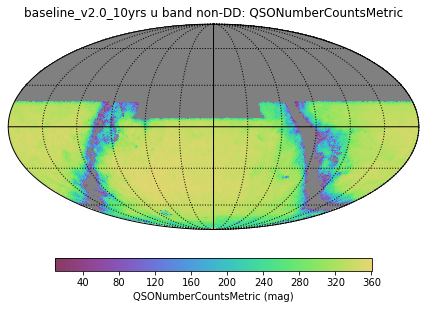

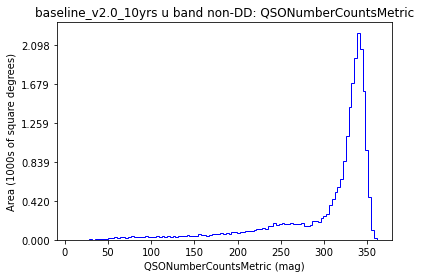

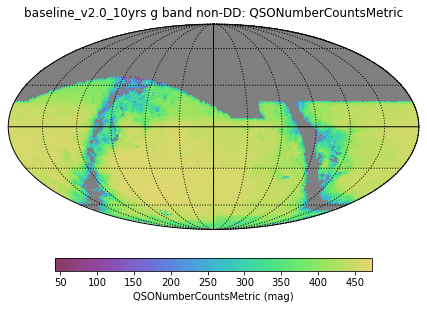

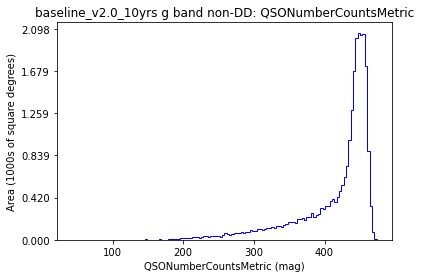

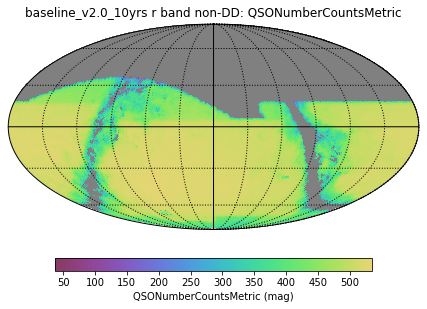

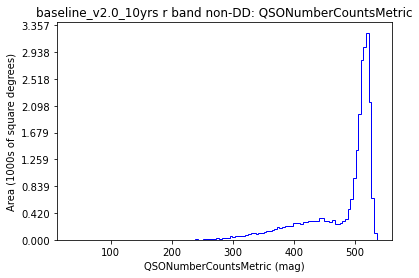

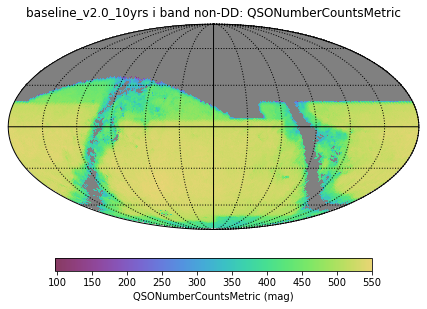

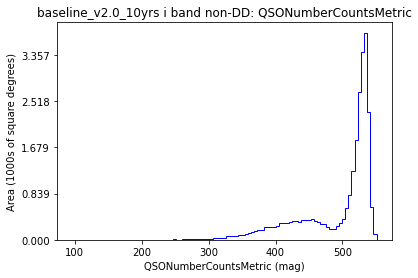

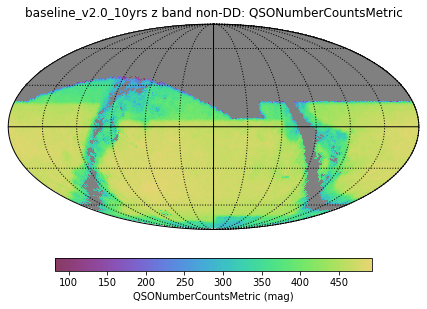

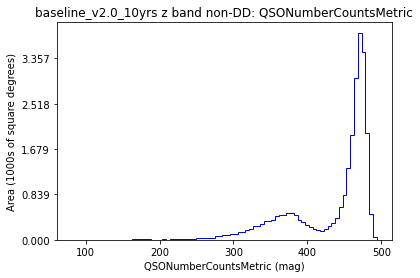

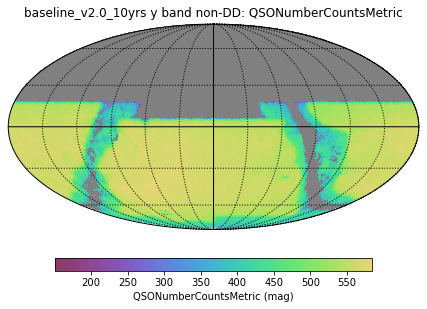

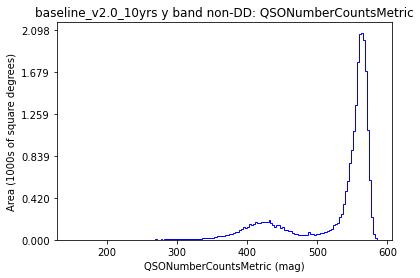

In [8]:
for f in ('u', 'g', 'r', 'i', 'z', 'y'):
    bundle[f].plot()

In [10]:
summary = maf.SumMetric(col='metric', metricName='Total QSO')
for f in ('u', 'g', 'r', 'i', 'z', 'y'):
    bundle[f].setSummaryMetrics([summary])
    bundle[f].computeSummaryStats()

In [28]:
pd.DataFrame([bundle[f].summaryValues['Total QSO'] for f in bundle], index=list(bundle.keys()), 
             columns=['Total QSO'])

,Total QSO
u,8.695105e+06
g,1.319080e+07
r,1.520206e+07
i,1.566788e+07
z,1.375050e+07
y,1.515059e+07
